# check coco dataset

In [5]:
import json
import os

In [6]:
path = "/root/autodl-tmp/seat_dataset/chengdu_customer/"

coco_file = os.path.join("../predict_coco.json")

with open(coco_file, "r") as f:
    coco_data = json.load(f)

print(coco_data)

{'images': [{'id': 0, 'license': 1, 'file_name': '1756717183496__p_0002_f9f1d25c48db4b5086d68fa9f522e487_36f506a54abd4ee7af.jpg', 'height': 2048.0, 'width': 2046.0, 'date_captured': 'n/a', 'mask_null': False, 'interested_area': [], 'not_interested_area': []}, {'id': 1, 'license': 1, 'file_name': '1756717182510__p_0032_34e0b790feab421d8063f79818275cdc_d52fe91456bc4f3286.jpg', 'height': 2048.0, 'width': 2046.0, 'date_captured': 'n/a', 'mask_null': False, 'interested_area': [], 'not_interested_area': []}, {'id': 2, 'license': 1, 'file_name': '1756717183312__p_0019_0683254627f94ff08cfcf1aadc9d7374_ab50d8e7335a4692ac.jpg', 'height': 2048.0, 'width': 2046.0, 'date_captured': 'n/a', 'mask_null': False, 'interested_area': [], 'not_interested_area': []}, {'id': 3, 'license': 1, 'file_name': '1756717181427_2088f67d-f81d-448a-bdb5-e7c643770ea0.jpeg', 'height': 4100.0, 'width': 4096.0, 'date_captured': 'n/a', 'mask_null': False, 'interested_area': [], 'not_interested_area': []}, {'id': 4, 'license

In [7]:
coco_data["categories"]

[{'id': 0, 'name': '其他'},
 {'id': 1, 'name': '划伤'},
 {'id': 2, 'name': '压痕'},
 {'id': 3, 'name': '吊紧'},
 {'id': 4, 'name': '异物外漏'},
 {'id': 5, 'name': '折痕'},
 {'id': 6, 'name': '抛线'},
 {'id': 7, 'name': '拼接间隙'},
 {'id': 8, 'name': '水渍'},
 {'id': 9, 'name': '烫伤'},
 {'id': 10, 'name': '破损'},
 {'id': 11, 'name': '碰伤'},
 {'id': 12, 'name': '红标签'},
 {'id': 13, 'name': '线头'},
 {'id': 14, 'name': '脏污'},
 {'id': 15, 'name': '褶皱(T型)'},
 {'id': 16, 'name': '褶皱（重度）'},
 {'id': 17, 'name': '重跳针'}]

/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22443 (\N{CJK UNIFIED IDEOGRAPH-57AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21491 (\N{CJK UNIFIED IDEOGRAPH-53F3}) missing from fon

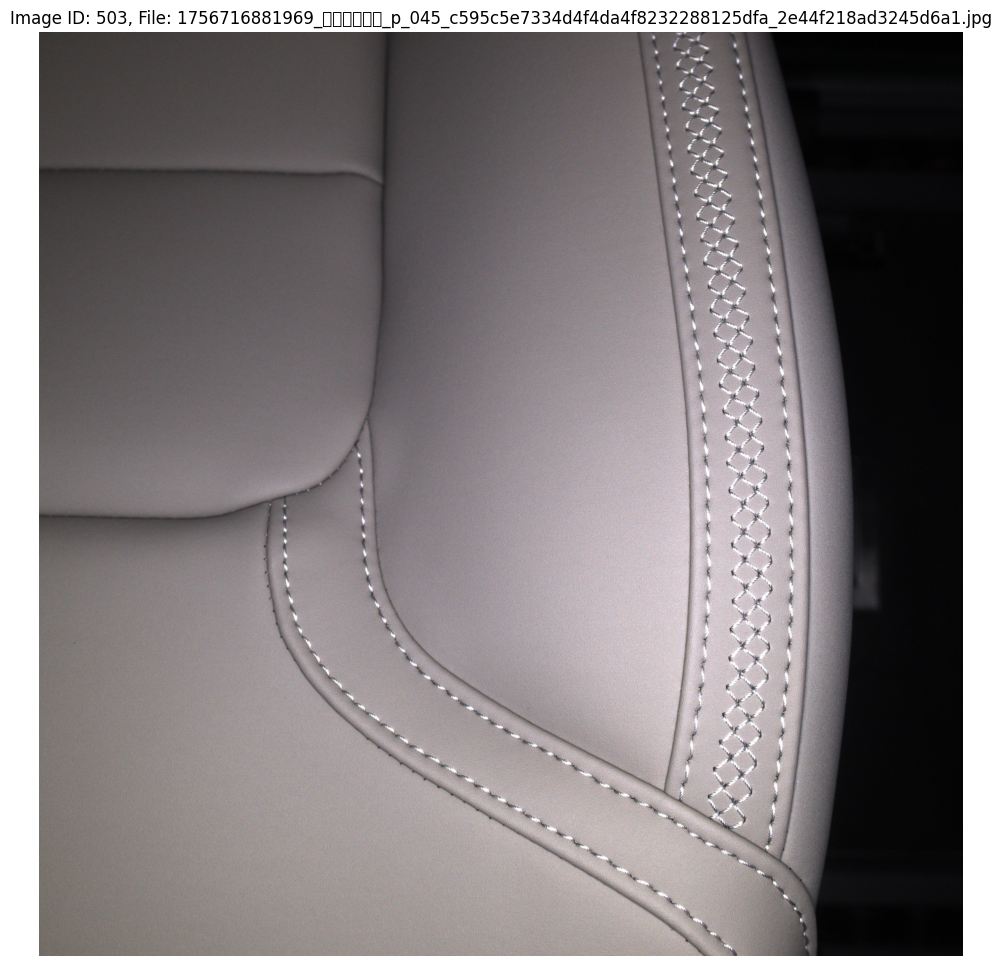

In [9]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# 随机选择一张图片
images = coco_data["images"]
annotations = coco_data["annotations"]
categories = {cat["id"]: cat["name"] for cat in coco_data["categories"]}

img_info = random.choice(images)
img_id = img_info["id"]
img_path = os.path.join(path, img_info["file_name"])

# 读取图片
img = cv2.imread(img_path)
if img is None:
    print(f"图片未找到: {img_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 获取该图片的所有标注框
    anns = [ann for ann in annotations if ann["image_id"] == img_id]

    # 可视化
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.imshow(img)
    for ann in anns:
        bbox = ann["bbox"]  # [x, y, w, h]
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        cat_name = categories.get(ann["category_id"], str(ann["category_id"]))
        ax.text(
            bbox[0], bbox[1] - 2, cat_name,
            fontsize=12, color='yellow', backgroundcolor='black'
        )
    ax.set_title(f"Image ID: {img_id}, File: {img_info['file_name']}")
    plt.axis('off')
    plt.show()
